## EDA

In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Importing dataset

In [2]:
df=pd.read_csv('data.csv')
y=df['policyID']
df=pd.DataFrame(df)
df.head()

,policyID,statecode,county,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,line,construction,point_granularity
0,119736,FL,CLAY COUNTY,498960.0,498960.00,498960.0,498960.0,498960.00,792148.90,0.0,9979.2,0.0,0,30.102261,-81.711777,Residential,Masonry,1
1,448094,FL,CLAY COUNTY,1322376.3,1322376.30,1322376.3,1322376.3,1322376.30,1438163.57,0.0,0.0,0.0,0,30.063936,-81.707664,Residential,Masonry,3
2,206893,FL,CLAY COUNTY,190724.4,190724.40,190724.4,190724.4,190724.40,192476.78,0.0,0.0,0.0,0,30.089579,-81.700455,Residential,Wood,1
3,333743,FL,CLAY COUNTY,0.0,79520.76,0.0,0.0,79520.76,86854.48,0.0,0.0,0.0,0,30.063236,-81.707703,Residential,Wood,3
4,172534,FL,CLAY COUNTY,0.0,254281.50,0.0,254281.5,254281.50,246144.49,0.0,0.0,0.0,0,30.060614,-81.702675,Residential,Wood,1


## Description of dataset
We need to know the different kinds of data and other statistics of our data before we can move on to the other steps. A good one is to start with the describe() function in python.

In [3]:
df.describe()

,policyID,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,point_granularity
count,36634.000000,3.663400e+04,3.663400e+04,3.663400e+04,3.663400e+04,3.663400e+04,3.663400e+04,3.663400e+04,3.663400e+04,36634.000000,36634.000000,36634.000000,36634.000000,36634.000000
mean,548661.937189,7.314780e+05,2.074348e+06,6.646009e+05,9.911724e+05,2.172875e+06,2.571004e+06,7.787908e+02,7.037985e+03,192.453210,26.483594,28.087477,-81.903565,1.640907
std,259912.926494,1.752300e+07,1.964150e+07,1.746114e+07,1.767178e+07,2.015015e+07,2.036777e+07,4.787979e+04,9.582593e+04,8037.713716,4702.740932,1.647734,1.809066,1.070561
min,100074.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01,7.337000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,24.547514,-87.447290,1.000000
25%,323647.750000,0.000000e+00,4.248106e+04,0.000000e+00,0.000000e+00,4.562415e+04,5.401351e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,26.471996,-82.439331,1.000000
50%,548525.000000,0.000000e+00,1.926911e+05,0.000000e+00,0.000000e+00,2.021051e+05,2.416310e+05,0.000000e+00,0.000000e+00,0.000000,0.000000,28.057077,-81.585700,1.000000
75%,774252.000000,0.000000e+00,9.163381e+05,0.000000e+00,5.741010e+04,9.465821e+05,1.128871e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,29.623005,-80.372910,3.000000
max,999971.000000,2.160000e+09,2.160000e+09,2.160000e+09,2.160000e+09,2.160000e+09,1.701000e+09,6.273765e+06,7.380000e+06,450000.000000,900000.000000,30.989820,-80.033257,7.000000


## Handling missing values
Missing values need to be handled carefully because they reduce the quality of any of our performance matrix. It can also lead to wrong prediction or classification and can also cause a high bias for any given model being used.
Below are some of the techniques:

1)Drop NULL Values
2)Fill Missing Values
3)Predict Missing values with an ML Algorithm

In [4]:
df.shape

(36634, 18)

In [5]:
df=df.dropna()
df.shape

(36634, 18)

# Handling Outliers
Since we don't have any null values now we check outliers in our dataset
An outlier is something which is separate or different from the crowd. Outliers can be a result of a mistake during data collection or it can be just an indication of variance in your data. Some of the methods for detecting and handling outliers:

1)BoxPlot
2)Scatterplot
3)Z-score
4)IQR(Inter-Quartile Range)

## Box Plot
A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data.

In [6]:
df.columns

Index(['policyID', 'statecode', 'county', 'eq_site_limit', 'hu_site_limit',
       'fl_site_limit', 'fr_site_limit', 'tiv_2011', 'tiv_2012',
       'eq_site_deductible', 'hu_site_deductible', 'fl_site_deductible',
       'fr_site_deductible', 'point_latitude', 'point_longitude', 'line',
       'construction', 'point_granularity'],
      dtype='object')

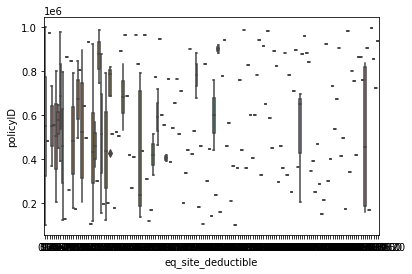

In [7]:
sns.boxplot(x=df['eq_site_deductible'],y=y)

## Scatter plot
A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

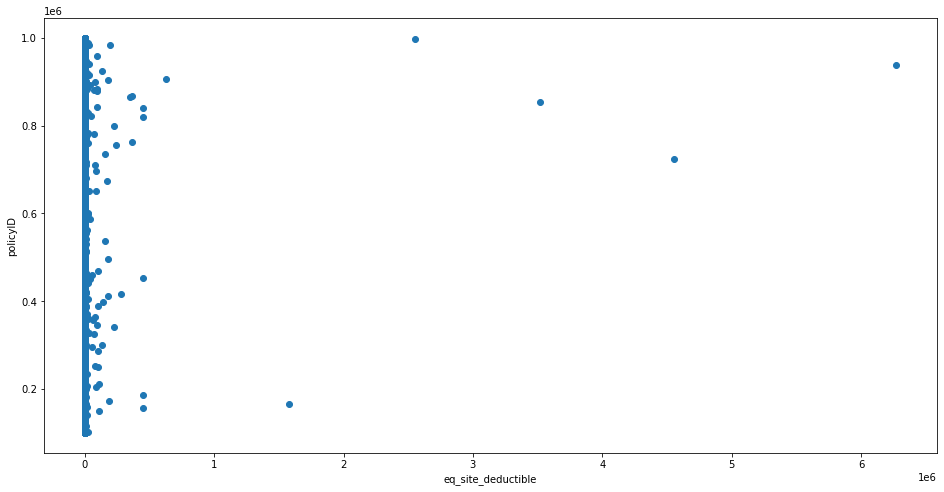

In [8]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['eq_site_deductible'] , y)
ax.set_xlabel('eq_site_deductible')
ax.set_ylabel('policyID')
plt.show()

## IQR:
The interquartile range (IQR) is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles.

## IQR = Q3 − Q1.

In [9]:
Q1 = df.quantile(0.25) # 25th percentile
Q3 = df.quantile(0.75) # 75th percentile
IQR = Q3-Q1
IQR

policyID              4.506042e+05
eq_site_limit         0.000000e+00
hu_site_limit         8.738570e+05
fl_site_limit         0.000000e+00
fr_site_limit         5.741010e+04
tiv_2011              9.009580e+05
tiv_2012              1.074858e+06
eq_site_deductible    0.000000e+00
hu_site_deductible    0.000000e+00
fl_site_deductible    0.000000e+00
fr_site_deductible    0.000000e+00
point_latitude        3.151009e+00
point_longitude       2.066421e+00
point_granularity     2.000000e+00
dtype: float64

In [10]:
#Once we have IQR scores below code will remove all the outliers in our dataset.
df_outlier_IQR = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df_outlier_IQR.shape

(19174, 18)

## Understanding relationships and new insights through plots :
We can get many relations in our data by visualizing our dataset. Let’s go through some techniques in order to see the insights.

1)HeatMaps

## Heat Map
The Heat Map procedure shows the distribution of a quantitative variable over all combinations of 2 categorical factors. If one of the 2 factors represents time, then the evolution of the variable can be easily viewed using the map. The correlation between two random variables is a number that runs from -1 through 0 to +1.

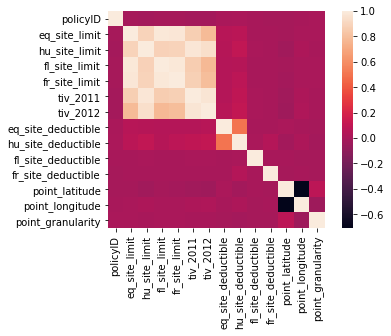

In [11]:
# HeatMap

correaltion_matrix = df.corr()
sns.heatmap(data=correaltion_matrix,square=True)
